# Данные

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import itertools
from scipy import linalg
import matplotlib as mpl
from sklearn import mixture
from scipy.stats import norm, multivariate_normal, gaussian_kde, dirichlet, wishart, t
from scipy.integrate import quad, nquad
from scipy.special import gammaln, psi, digamma, gamma
from scipy.linalg import det, inv
from sklearn.model_selection import train_test_split
import gmr

In [3]:
# data 
# = pd.read_excel('euro_dollar_without_crisis.xlsx')
data = pd.read_excel('euro_dollar.xlsx')
data = data.sort_values(by = ['curs_euro'])
data.head()

data = data[data['curs_euro'] > -0.14]

list_of_euro = list(data['curs_euro'])
list_of_dollar = list(data['curs_dollar'])
n_samples = data['curs_euro'].size
n_samples

np_data_dollar = np.array(data['curs_dollar']).reshape(-1, 1)
np_data_euro = np.array(data['curs_euro']).reshape(-1, 1)
np_data_euro

array([[-0.08408749],
       [-0.07404701],
       [-0.0712909 ],
       ...,
       [ 0.10664213],
       [ 0.10718334],
       [ 0.10994489]], shape=(6274, 1))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    np_data_euro, 
    np_data_dollar, 
    test_size=0.2,  # Доля тестовой выборки (можно указать train_size)
    random_state=42,  # Для воспроизводимости
)

XY_train = np.concatenate([X_train, y_train], axis = 1)
XY_test = np.concatenate([X_test, y_test], axis = 1)

n_samples_train = X_train.shape[0]
n_samples_test = X_test.shape[0]

In [5]:
minimum = int(min(np_data_euro)[0] * 1000 - 1)
maximum = int(max(np_data_euro)[0] * 1000 + 1)
a_s = np.array([i / 1000 for i in range(minimum, maximum)])
a_s

array([-0.085, -0.084, -0.083, -0.082, -0.081, -0.08 , -0.079, -0.078,
       -0.077, -0.076, -0.075, -0.074, -0.073, -0.072, -0.071, -0.07 ,
       -0.069, -0.068, -0.067, -0.066, -0.065, -0.064, -0.063, -0.062,
       -0.061, -0.06 , -0.059, -0.058, -0.057, -0.056, -0.055, -0.054,
       -0.053, -0.052, -0.051, -0.05 , -0.049, -0.048, -0.047, -0.046,
       -0.045, -0.044, -0.043, -0.042, -0.041, -0.04 , -0.039, -0.038,
       -0.037, -0.036, -0.035, -0.034, -0.033, -0.032, -0.031, -0.03 ,
       -0.029, -0.028, -0.027, -0.026, -0.025, -0.024, -0.023, -0.022,
       -0.021, -0.02 , -0.019, -0.018, -0.017, -0.016, -0.015, -0.014,
       -0.013, -0.012, -0.011, -0.01 , -0.009, -0.008, -0.007, -0.006,
       -0.005, -0.004, -0.003, -0.002, -0.001,  0.   ,  0.001,  0.002,
        0.003,  0.004,  0.005,  0.006,  0.007,  0.008,  0.009,  0.01 ,
        0.011,  0.012,  0.013,  0.014,  0.015,  0.016,  0.017,  0.018,
        0.019,  0.02 ,  0.021,  0.022,  0.023,  0.024,  0.025,  0.026,
      

In [10]:
best_gmm.covariances_

array([[[8.30048732e-05, 4.01759409e-05],
        [4.01759409e-05, 6.77395441e-05]],

       [[6.65604048e-04, 6.52718658e-04],
        [6.52718658e-04, 6.78808807e-04]],

       [[1.70191558e-05, 1.90114902e-06],
        [1.90114902e-06, 9.55685303e-06]]])

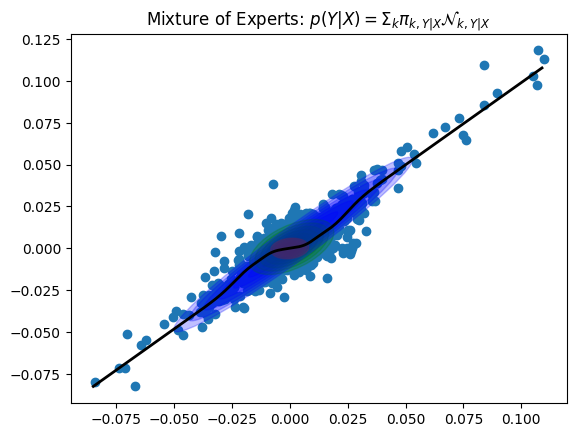

In [14]:

from gmr.utils import check_random_state
from gmr import MVN, GMM, plot_error_ellipses


best_gmm = mixture.BayesianGaussianMixture(max_iter=10000, mean_precision_prior=0.01,
                        n_components=3, weight_concentration_prior=100,
                        weight_concentration_prior_type='dirichlet_distribution')
best_gmm.fit(XY_train)
n_components = best_gmm.n_components
gmm = GMM(
    n_components=3, priors=best_gmm.weights_, means=best_gmm.means_,
    covariances=best_gmm.covariances_)


Y = gmm.predict(np.array([0]), a_s[:, np.newaxis])


plt.title("Mixture of Experts: $p(Y | X) = \Sigma_k \pi_{k, Y|X} "
          "\mathcal{N}_{k, Y|X}$")
plt.scatter(XY_train[:, 0], XY_train[:, 1])
plot_error_ellipses(plt.gca(), gmm, colors=["r", "g", "b"])
plt.plot(a_s, Y.ravel(), c="k", lw=2)

plt.show()